# Coursework 2 for Cardiac MR Image Segmentation (2020-2021)

Implementation of SegNet-like architecture

In [1]:
from matplotlib import pyplot as plt
def show_image_mask(img, mask, cmap='gray'): # visualisation
    fig = plt.figure(figsize=(5,5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap=cmap)
    plt.axis('off')
    
def show_image_mask_pred(img, mask, pred, cmap='gray'): # visualisation
    fig = plt.figure(figsize=(5,5))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap=cmap)
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(pred, cmap=cmap)
    plt.axis('off')

In [2]:
import torch
import torch.utils.data as data
import cv2
import os
from glob import glob

class TrainDataset(data.Dataset):
    def __init__(self, root=''):
        super(TrainDataset, self).__init__()
        self.img_files = glob(os.path.join(root,'image','*.png'))
        self.mask_files = []
        for img_path in self.img_files:
            basename = os.path.basename(img_path)
            self.mask_files.append(os.path.join(root,'mask',basename[:-4]+'_mask.png'))
            

    def __getitem__(self, index):
            img_path = self.img_files[index]
            mask_path = self.mask_files[index]
            data = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            label = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
            return torch.from_numpy(data).float(), torch.from_numpy(label).float()

    def __len__(self):
        return len(self.img_files)

class TestDataset(data.Dataset):
    def __init__(self, root=''):
        super(TestDataset, self).__init__()
        self.img_files = glob(os.path.join(root,'image','*.png'))

    def __getitem__(self, index):
            img_path = self.img_files[index]
            data = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            return torch.from_numpy(data).float()

    def __len__(self):
        return len(self.img_files)


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

class CNNSEG(nn.Module): # Define your model
    def __init__(self):
        super(CNNSEG, self).__init__()
        # fill in the constructor for your model here
        self.encoder_00 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=1,
                                                          out_channels=64,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(64)
                                                ])
        self.encoder_01 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=64,
                                                          out_channels=64,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(64)
                                                ])
        self.encoder_10 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=64,
                                                          out_channels=128,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(128)
                                                ])
        self.encoder_11 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=128,
                                                          out_channels=128,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(128)
                                                ])
        self.encoder_20 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=128,
                                                          out_channels=256,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(256)
                                                ])
        self.encoder_21 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=256,
                                                          out_channels=256,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(256)
                                                ])
        self.encoder_22 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=256,
                                                          out_channels=256,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(256)
                                                ])
        self.encoder_30 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=256,
                                                          out_channels=512,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(512)
                                                ])
        self.encoder_31 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=512,
                                                          out_channels=512,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(512)
                                                ])
        self.encoder_32 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=512,
                                                          out_channels=512,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(512)
                                                ])
        self.encoder_40 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=512,
                                                          out_channels=512,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(512)
                                                ])
        self.encoder_41 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=512,
                                                          out_channels=512,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(512)
                                                ])
        self.encoder_42 = nn.Sequential(*[
                                                nn.Conv2d(in_channels=512,
                                                          out_channels=512,
                                                          kernel_size=3,
                                                          padding=1),
                                                nn.BatchNorm2d(512)
                                                ])
        
        
        self.decoder_42 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=512,
                                                                   out_channels=512,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(512)
                                               ])
        self.decoder_41 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=512,
                                                                   out_channels=512,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(512)
                                               ])
        self.decoder_40 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=512,
                                                                   out_channels=512,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(512)
                                               ])
        self.decoder_32 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=512,
                                                                   out_channels=512,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(512)
                                               ])
        self.decoder_31 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=512,
                                                                   out_channels=512,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(512)
                                               ])
        self.decoder_30 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=512,
                                                                   out_channels=256,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(256)
                                               ])
        self.decoder_22 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=256,
                                                                   out_channels=256,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(256)
                                               ])
        self.decoder_21 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=256,
                                                                   out_channels=256,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(256)
                                               ])
        self.decoder_20 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=256,
                                                                   out_channels=128,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(128)
                                               ])
        self.decoder_11 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=128,
                                                                   out_channels=128,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(128)
                                               ])
        self.decoder_10 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=128,
                                                                   out_channels=64,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(64)
                                               ])
        self.decoder_01 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=64,
                                                                   out_channels=64,
                                                                   kernel_size=3,
                                                                   padding=1),
                                                nn.BatchNorm2d(64)
                                               ])
        self.decoder_00 = nn.Sequential(*[
                                                nn.ConvTranspose2d(in_channels=64,
                                                                   out_channels=4,
                                                                   kernel_size=3,
                                                                   padding=1)
                                               ])
        
        
    def forward(self, x):
        # fill in the forward function for your model here
        # Encoder

        # Encoder Stage - 1
        dim_0 = x.size()
        x_00 = F.relu(self.encoder_00(x))
        x_01 = F.relu(self.encoder_01(x_00))
        x_0, indices_0 = F.max_pool2d(x_01, kernel_size=2, stride=2, return_indices=True)

        # Encoder Stage - 2
        dim_1 = x_0.size()
        x_10 = F.relu(self.encoder_10(x_0))
        x_11 = F.relu(self.encoder_11(x_10))
        x_1, indices_1 = F.max_pool2d(x_11, kernel_size=2, stride=2, return_indices=True)

        # Encoder Stage - 3
        dim_2 = x_1.size()
        x_20 = F.relu(self.encoder_20(x_1))
        x_21 = F.relu(self.encoder_21(x_20))
        x_22 = F.relu(self.encoder_22(x_21))
        x_2, indices_2 = F.max_pool2d(x_22, kernel_size=2, stride=2, return_indices=True)

        # Encoder Stage - 4
        dim_3 = x_2.size()
        x_30 = F.relu(self.encoder_30(x_2))
        x_31 = F.relu(self.encoder_31(x_30))
        x_32 = F.relu(self.encoder_32(x_31))
        x_3, indices_3 = F.max_pool2d(x_32, kernel_size=2, stride=2, return_indices=True)

        # Encoder Stage - 5
        dim_4 = x_3.size()
        x_40 = F.relu(self.encoder_40(x_3))
        x_41 = F.relu(self.encoder_41(x_40))
        x_42 = F.relu(self.encoder_42(x_41))
        x_4, indices_4 = F.max_pool2d(x_42, kernel_size=2, stride=2, return_indices=True)

        # Decoder

        dim_d = x_4.size()

        # Decoder Stage - 5
        x_4d = F.max_unpool2d(x_4, indices_4, kernel_size=2, stride=2, output_size=dim_4)
        x_42d = F.relu(self.decoder_42(x_4d))
        x_41d = F.relu(self.decoder_41(x_42d))
        x_40d = F.relu(self.decoder_40(x_41d))
        dim_4d = x_40d.size()

        # Decoder Stage - 4
        x_3d = F.max_unpool2d(x_40d, indices_3, kernel_size=2, stride=2, output_size=dim_3)
        x_32d = F.relu(self.decoder_32(x_3d))
        x_31d = F.relu(self.decoder_31(x_32d))
        x_30d = F.relu(self.decoder_30(x_31d))
        dim_3d = x_30d.size()

        # Decoder Stage - 3
        x_2d = F.max_unpool2d(x_30d, indices_2, kernel_size=2, stride=2, output_size=dim_2)
        x_22d = F.relu(self.decoder_22(x_2d))
        x_21d = F.relu(self.decoder_21(x_22d))
        x_20d = F.relu(self.decoder_20(x_21d))
        dim_2d = x_20d.size()

        # Decoder Stage - 2
        x_1d = F.max_unpool2d(x_20d, indices_1, kernel_size=2, stride=2, output_size=dim_1)
        x_11d = F.relu(self.decoder_11(x_1d))
        x_10d = F.relu(self.decoder_10(x_11d))
        dim_1d = x_10d.size()

        # Decoder Stage - 1
        x_0d = F.max_unpool2d(x_10d, indices_0, kernel_size=2, stride=2, output_size=dim_0)
        x_01d = F.relu(self.decoder_01(x_0d))
        x_00d = self.decoder_00(x_01d)
        dim_0d = x_00d.size()

        x_softmax = F.softmax(x_00d, dim=1)

        return x_softmax, x_00d

model = CNNSEG() # We can now create a model using your defined segmentation model

In [4]:
LEARNING_RATE = 0.001

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                                     lr=LEARNING_RATE)
train_loss = list()
val_loss = list()

In [16]:
from torch.utils.data import DataLoader

data_path = './data/train'
val_path = './data/val'
num_workers = 8
batch_size = 10
train_set = TrainDataset(data_path)
val_set = TrainDataset(val_path)

training_data_loader = DataLoader(dataset=train_set, num_workers=num_workers, batch_size=batch_size, shuffle=True)
validating_data_loader = DataLoader(dataset=val_set, num_workers=num_workers, batch_size=batch_size, shuffle=True)


data_loader = {'train':training_data_loader,
              'validate':validating_data_loader}

EPOCHS = 10

# Fetch images and labels. 
for epochs in range(EPOCHS):
    print('Epoch {}/{}'.format(epochs, EPOCHS - 1))
    print('-' * 10)
    
    for phase in ['train', 'validate']:
        
        if phase == 'train':
            model.train(True)
        else:
            model.train(False)
        
        batch_loss = 0.0
        
        for index, sample in enumerate(data_loader[phase]):
            img, mask = sample
            img_scale = img/255.
            #show_image_mask(img[0,...].squeeze(), mask[0,...].squeeze()) #visualise all data in training set
            #plt.pause(1)

            # Write your FORWARD below
            # Note: Input image to your model and ouput the predicted mask and Your predicted mask should have 4 channels

            img_scale = img_scale.unsqueeze(1)
            optimizer.zero_grad()
            seg_soft, seg = model(img_scale)

            #show_image_mask_pred(img[0,...].squeeze(), mask[0,...].squeeze(), torch.argmax(seg_soft, dim=1)[0,...].squeeze().float())

            # Then write your BACKWARD & OPTIMIZE below
            # Note: Compute Loss and Optimize
            loss = loss_fn(seg_soft,
                           mask.long())
            
            if phase == 'train':
                loss.backward()
                optimizer.step()
            
            batch_loss += loss.item()
        
        epoch_loss = batch_loss / (index + 1)
        
        if phase == 'train':
            train_loss.append(epoch_loss)
        else:
            val_loss.append(epoch_loss)

Epoch 0/9
----------
Epoch 1/9
----------
Epoch 2/9
----------
Epoch 3/9
----------
Epoch 4/9
----------
Epoch 5/9
----------
Epoch 6/9
----------
Epoch 7/9
----------
Epoch 8/9
----------
Epoch 9/9
----------


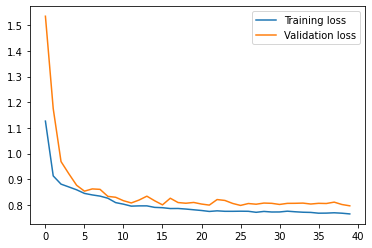

In [18]:
plt.plot(train_loss, label="Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.show()

In [19]:
import numpy as np
np.argmin(val_loss)

39

In [20]:
data_path = './data/test'
num_workers = 8
batch_size = 1
test_set = TestDataset(data_path)

test_data_loader = DataLoader(dataset=test_set, num_workers=num_workers, batch_size=batch_size, shuffle=True)

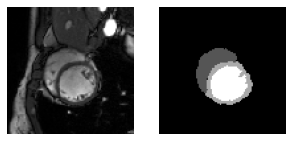

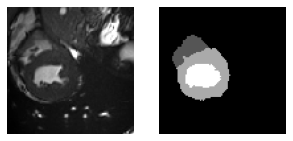

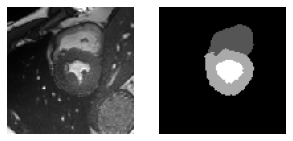

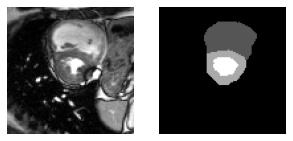

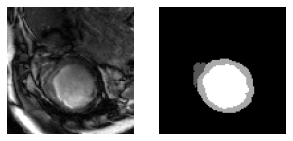

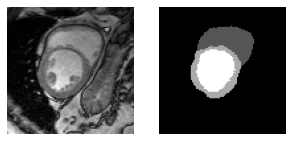

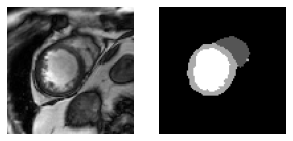

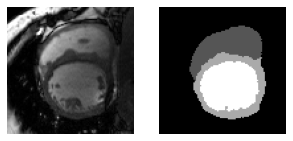

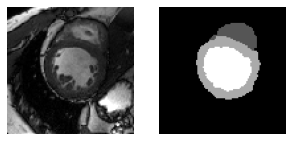

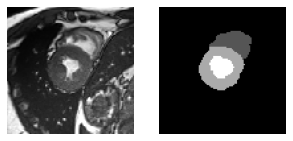

In [21]:
for iteration, sample in enumerate(training_data_loader):
    img = sample[0]
    img_scale = img/255.
    #show_image_mask(img[0,...].squeeze(), mask[0,...].squeeze()) #visualise all data in training set
    plt.pause(1)

    # Write your FORWARD below
    # Note: Input image to your model and ouput the predicted mask and Your predicted mask should have 4 channels

    img_scale = img_scale.unsqueeze(1)
    seg_soft, seg = model(img_scale)

    show_image_mask(img[0,...].squeeze(), torch.argmax(seg_soft, dim=1)[0,...].squeeze().float())
